In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
data_valid = []
for i in [0, 1, 2]:
    data_valid.append(
        pd.read_csv(
            f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_ms8_mu1125_lr1e-05_me5_{i}_valid-tag-accuracy.csv"
        )
    )

In [3]:
data_valid[0]

,Wall time,Step,Value
0,1.669066e+09,225,69.0
1,1.669066e+09,450,70.0
2,1.669066e+09,675,80.0
3,1.669066e+09,900,77.5
4,1.669066e+09,1125,81.0


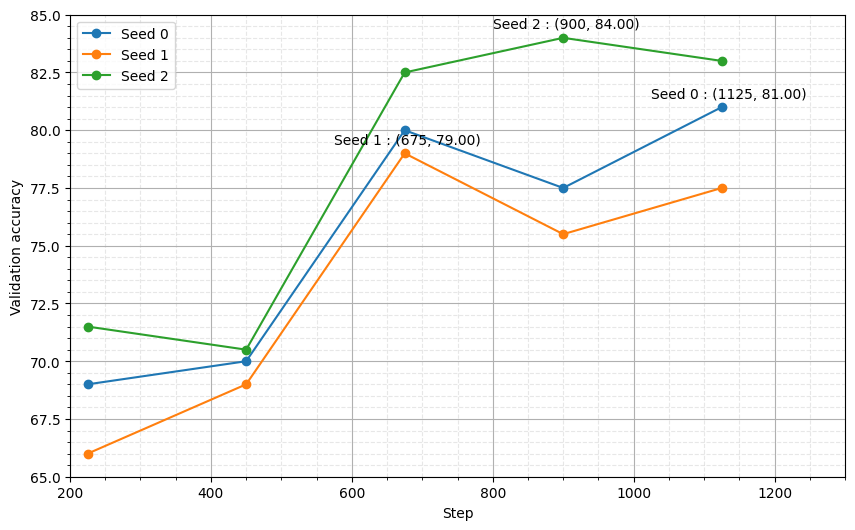

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [0, 1, 2]:
    df = data_valid[i]
    plt.plot(df["Step"], df["Value"], label=f"Seed {i}", marker="o")
    _, step, value = df.sort_values(by="Value", ascending=False).iloc[0]
    plt.annotate(f"Seed {i} : ({int(step)}, {value:.2f})", (step - 100, value + 0.4))

plt.xlabel("Step")
plt.ylabel("Validation accuracy")
plt.xlim((200, 1300))
plt.ylim((65, 85))

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major")
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.3)
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.3)

plt.legend(loc="upper left")

plt.savefig("plot_data/fairseq_validation_accuracy.pdf", bbox_inches="tight")
plt.show()

In [5]:
data_test = []
for i in [0, 1, 2]:
    data_test.append(
        pd.read_csv(
            f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_ms8_mu1125_lr1e-05_me5_{i}_test-tag-accuracy.csv"
        )
    )

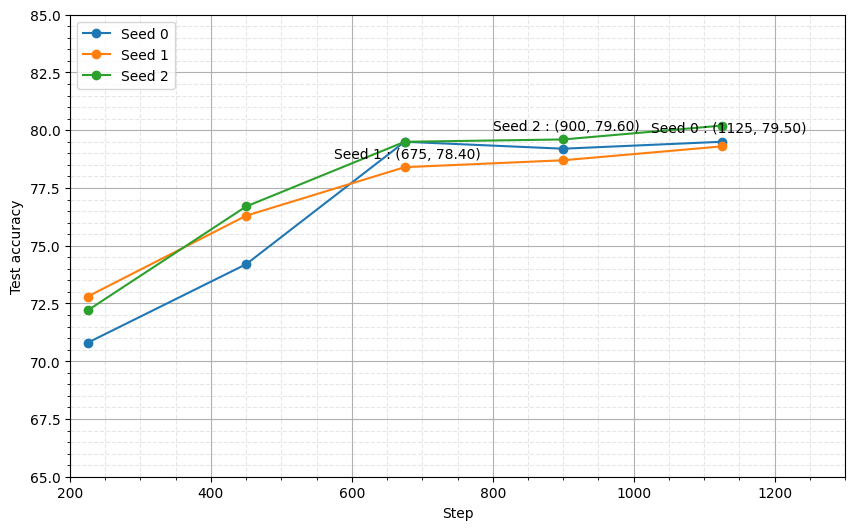

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [0, 1, 2]:
    df = data_test[i]
    plt.plot(df["Step"], df["Value"], label=f"Seed {i}", marker="o")
    index = data_valid[i].sort_values(by="Value", ascending=False).iloc[0].name
    _, step, value = df.loc[index]
    plt.annotate(f"Seed {i} : ({int(step)}, {value:.2f})", (step - 100, value + 0.4))

plt.xlabel("Step")
plt.ylabel("Test accuracy")
plt.xlim((200, 1300))
plt.ylim((65, 85))

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major")
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.3)
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.3)

plt.legend(loc="upper left")

plt.savefig("plot_data/fairseq_test_accuracy.pdf", bbox_inches="tight")
plt.show()

In [7]:
data_test_random = []
for i in [0, 1, 2]:
    data_test_random.append(
        pd.read_csv(
            f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_random_ms8_mu1125_lr1e-05_me5_{i}_test-tag-accuracy.csv"
        )
    )

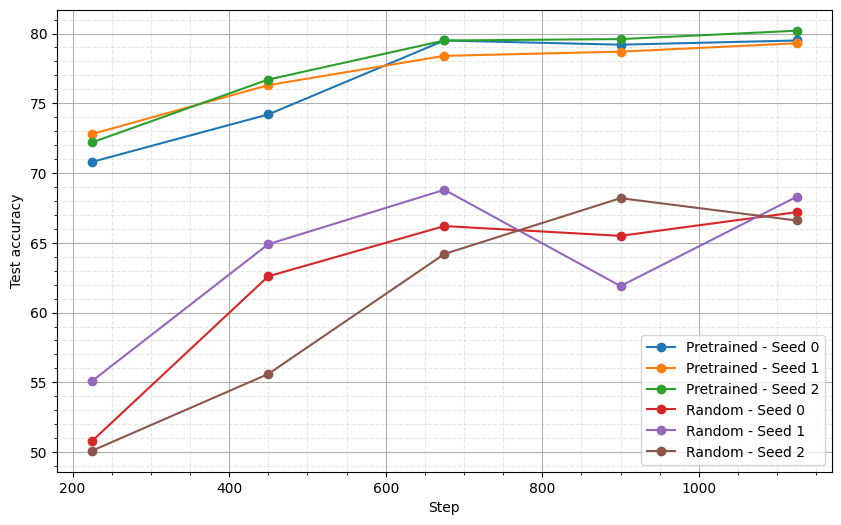

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [0, 1, 2]:
    df = data_test[i]
    plt.plot(df["Step"], df["Value"], label=f"Pretrained - Seed {i}", marker="o")

for i in [0, 1, 2]:
    df = data_test_random[i]
    plt.plot(df["Step"], df["Value"], label=f"Random - Seed {i}", marker="o")

plt.xlabel("Step")
plt.ylabel("Test accuracy")
# plt.xlim((200, 1300))
# plt.ylim((65, 85))

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major")
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.3)
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.3)

plt.legend()

plt.savefig(
    "plot_data/fairseq_test_pretrained_random_accuracy.pdf", bbox_inches="tight"
)
plt.show()

In [9]:
data_huggingface = []
data_huggingface.append(
    pd.read_csv(
        f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_huggingface_ms8_lr1e-05_me5_0_runs_Nov21_21-35-17_AROZYM-tag-eval_accuracy.csv"
    )
)
data_huggingface.append(
    pd.read_csv(
        f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_huggingface_ms8_lr1e-05_me5_1_runs_Nov21_21-35-56_AROZYM-tag-eval_accuracy.csv"
    )
)
data_huggingface.append(
    pd.read_csv(
        f"plot_data/run-sentence_prediction_books_RoBERTa_small_fr_huggingface_ms8_lr1e-05_me5_2_runs_Nov21_21-36-41_AROZYM-tag-eval_accuracy.csv"
    )
)

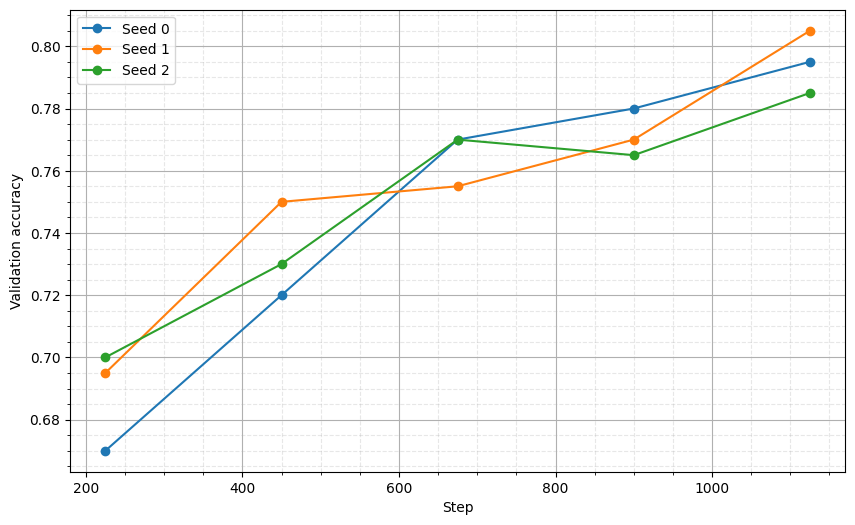

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [0, 1, 2]:
    df = data_huggingface[i]
    plt.plot(df["Step"], df["Value"], label=f"Seed {i}", marker="o")

plt.xlabel("Step")
plt.ylabel("Validation accuracy")
# plt.xlim((200, 1300))
# plt.ylim((65, 85))

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major")
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.3)
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.3)

plt.legend()

plt.savefig("plot_data/huggingface_validation_accuracy.pdf", bbox_inches="tight")
plt.show()